# Overview

This notebook includes:
- SHAP explanation for tabular data classification
- Classification task is breast cancer classification
- Demo explaining Logistic Regression model with Kernel SHAP
- Demo explaining Logistic Regression model with Linear SHAP
- Demo explaining XGBoost model with Tree SHAP
- Coding Challenge: Implement the LIME explanation for the same prediction

## Background
**Implementation of SHAP for Tabular data**

The source code of SHAP is accessible over [Github](https://github.com/slundberg/shap).

In this notebook we are using logistic regression model as a classifier.

The classification task was to perform breast cancer classification and the dataset can be accessed from [UCI Repository](https://goo.gl/U2Uwz2).


In [1]:
# Install a pip package in the current Jupyter kernel
!pip install shap
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.1 MB/s eta 0:00:00


In [2]:
# Load required packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import xgboost
%matplotlib inline
import seaborn as sns

In [3]:
#Load dataset
cancer_data = load_breast_cancer()

# Describe dataset
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# Create a Pandas dataframe with all the features
X = pd.DataFrame(data = cancer_data['data'], columns = cancer_data['feature_names'])
y = cancer_data['target']

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Scale data by using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(cancer_data.data)

In [7]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
X_train.shape

(455, 30)

In [8]:
type(X_train)

numpy.ndarray

In [9]:
# Print the names of first ten features
cancer_data.feature_names[0:10]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='<U23')

In [10]:
# Initialize Model
logit = LogisticRegression()

# Fit logistic regression on traning data
logit.fit(X_train,y_train)

LogisticRegression()

In [11]:
# Print accuracy of the logistic regression
print("Accuracy Score: ",logit.score(X_test,y_test))

Accuracy Score:  0.9649122807017544


## Explaining Logistic Regression model with Kernel SHAP

In [12]:
# Load ML Interpreting Models
import shap

# Explainer
explainer = shap.KernelExplainer(logit.predict_proba,X)

# Compute Shap Values
shap_values = explainer.shap_values(X_test[0])

In [13]:
# Initialize JavsScript for visualizations
shap.initjs()

# Plot a single prediction
shap.force_plot(explainer.expected_value[0],shap_values[0],X_test[0], feature_names=cancer_data['feature_names'])

In [14]:
# A Sample Prediction for Malignant value 15
shap_values2 = explainer.shap_values(X_test[15])

In [15]:
# Output for First
shap_values2[0]

array([ 0.02412633, -0.04912255,  0.02608215,  0.01430513,  0.02792138,
        0.01218211,  0.0551448 ,  0.10012522,  0.00912404, -0.01887   ,
        0.00548038,  0.        ,  0.00267639,  0.00508076,  0.        ,
        0.00136551, -0.00238303,  0.00173778,  0.00107196, -0.00277439,
        0.0411981 , -0.05782019,  0.03391351,  0.02083708,  0.02989173,
        0.01270027,  0.04729371,  0.10875453,  0.01209857,  0.0057899 ])

In [16]:
# Output for Second
shap_values2[1]

array([-0.02412633,  0.04912255, -0.02608215, -0.01430513, -0.02792138,
       -0.01218211, -0.0551448 , -0.10012522, -0.00912404,  0.01887   ,
       -0.00548038,  0.        , -0.00267639, -0.00508076,  0.        ,
       -0.00136551,  0.00238303, -0.00173778, -0.00107196,  0.00277439,
       -0.0411981 ,  0.05782019, -0.03391351, -0.02083708, -0.02989173,
       -0.01270027, -0.04729371, -0.10875453, -0.01209857, -0.0057899 ])

In [17]:
explainer.expected_value[0]

0.37171190937468496

In [18]:
# A Single Prediction
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values2[0],X_test[15], feature_names=cancer_data['feature_names'])

In [19]:
# A Single Prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values2[1],X_test[15], feature_names=cancer_data['feature_names'])

#### Narrative
+ Normal base value =.3587
+ The sum of the red and the blue = output 0.99
+ All the features in red are pushing the prediction from the base value to the prediction value

In [20]:
# Shap Values
shap_values_all = explainer.shap_values(X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

In [21]:
shap.initjs()
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test, feature_names=cancer_data['feature_names'])


#### Narrative
+ Red :: Features that push the prediction to the base line
+ Blue :: Features that pull the prediction lower from the base line      
+ NB:: You can check for individual features and compare each feature with the other

### Summary of All Effect of All Features
- Using shap.summary_plot()
- The SHAP summary plot provides a Global Model Interpretation

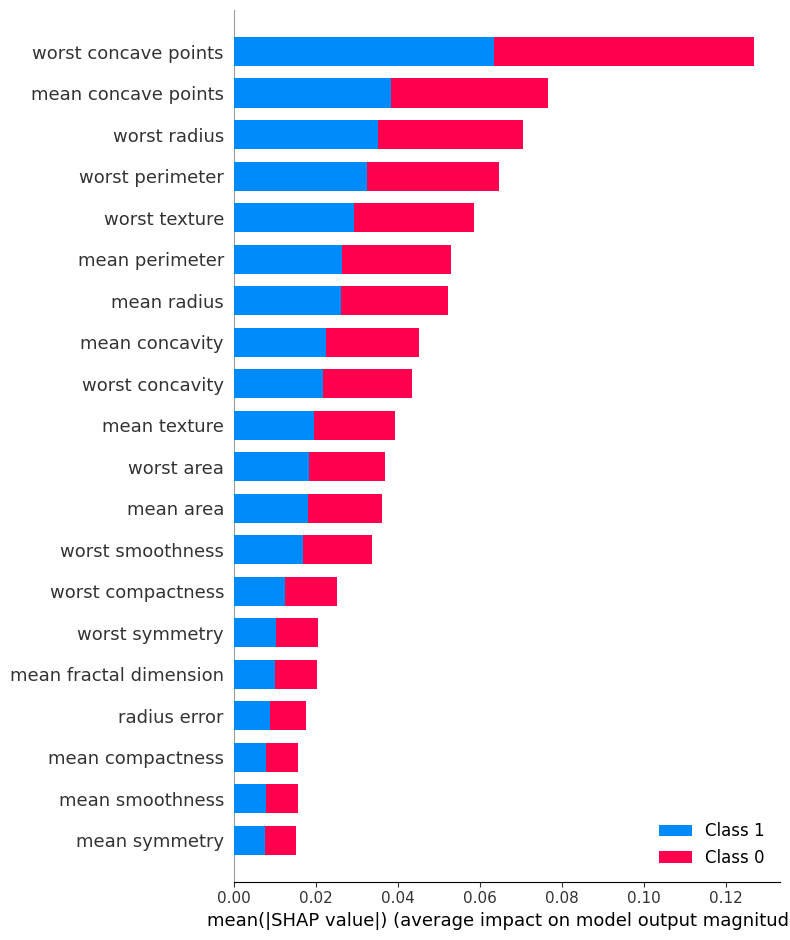

In [22]:
shap.summary_plot(shap_values_all,X_test, feature_names=cancer_data['feature_names'])

#### Narrative
+ The features are arranged based on order of impact
+ Bare Nuclei contributes more followed by uniform cell shape

### Dependency Plot
+ Shows the effect a single feature has on the prediction
+ How much the prediction depends on a particular feature
+ shap.dependence_plot(indexoffeature,matrix_shap_values,dataset_matrix)

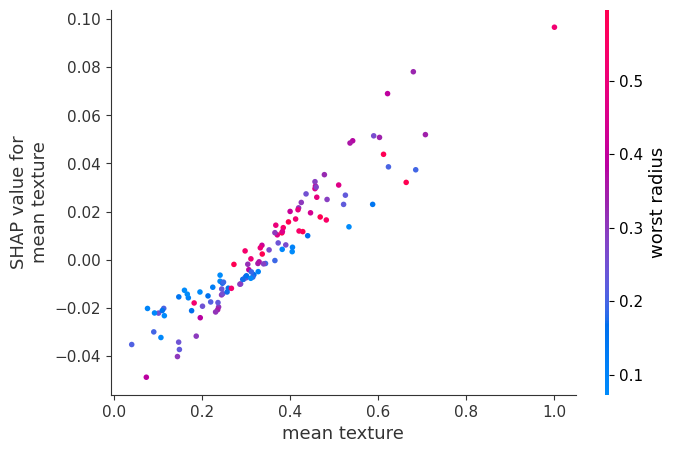

In [23]:
# Dependence Plot
shap.dependence_plot(1,shap_values_all[0],X_test, feature_names=cancer_data['feature_names'])

## Explaining Logistic Regression model with Linear SHAP

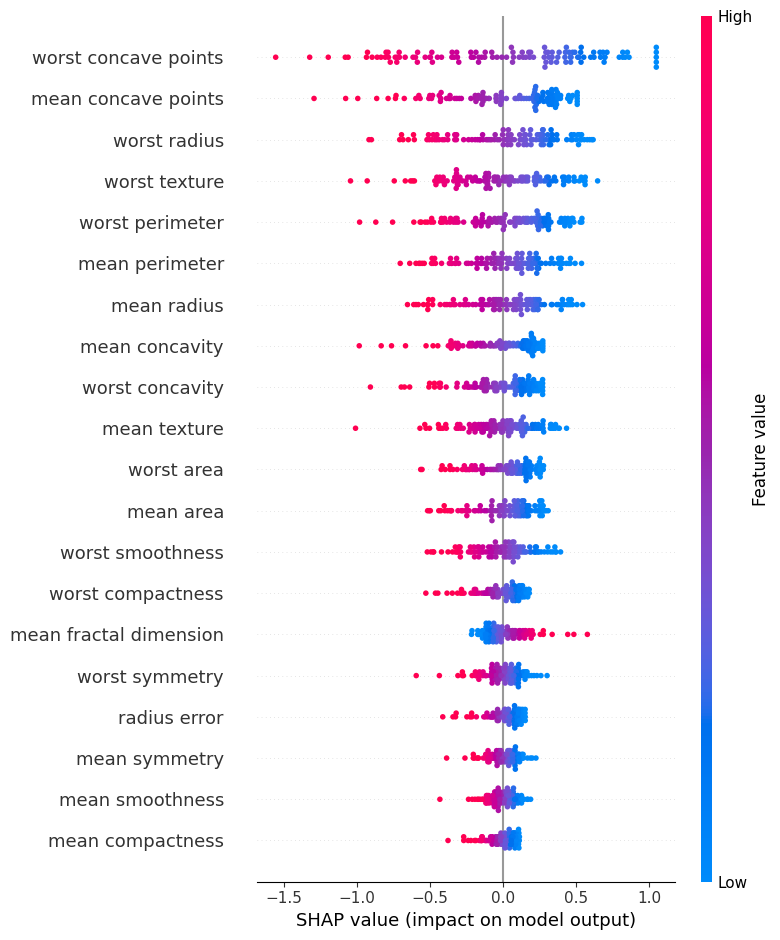

In [24]:
# Load a Linear Explainer from SHAP
explainer = shap.LinearExplainer(logit, X_train, feature_names=cancer_data['feature_names'])

# Compute Shap Values
shap_values = explainer.shap_values(X_test)

# Plot a for all test data
shap.summary_plot(shap_values, X_test, feature_names=cancer_data['feature_names'])

# Plot a single test instance
shap.initjs()
ind = 0
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test[ind,:],
    feature_names=cancer_data['feature_names']
)

# Coding Challenge:
- Implement the LIME explanation for the same prediction.
- Compare the feature explanations given by LIME and SHAP